In [1]:
import pygmo
import numpy as np

import math
import pylab
import matplotlib.pyplot as plt
import matplotlib.ticker as tic

In [2]:
#вспомогательные функции для отображения... функций

def make_data(f,bounds = [-2,2], n_pt = 100):
    x = np.arange(bounds[0], bounds[1], (bounds[1] - bounds[0])/n_pt)
    y = np.arange(bounds[0], bounds[1], (bounds[1] - bounds[0])/n_pt)
    xgrid, ygrid = np.meshgrid(x, y) 
    grid = np.stack([xgrid,ygrid],axis = -1)

    z = np.zeros_like(xgrid)
    for i in range(len(ygrid)):
        for j in range(len(grid)):
            z[i][j] = f(grid[i][j])
    
    return xgrid, ygrid, z

def plot_function(f, bounds = [-3,3]):
    _, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    x, y, z = make_data(f,bounds = bounds)
    ax.plot_surface(x, y, z)
    plt.show()


In [3]:
def display_comp_table(ct, true_minima_ = None):
    print("name\t| gen\t| opt coords\t\t| opt val\t| err")
    print("-------------------------------------------------------------")
    for elm in ct:
        print(f"{elm[0]}\t| {elm[1]}\t| ({elm[2][0]:.2} {elm[2][1]:.2})\t| {elm[3][0]:.2}\t| {np.abs(true_minima_[0] - elm[2]).round(2)}")
        

In [4]:
def f_1(point: np.array):
    # глоб. минимум 0,0 (0)
    return np.sum(np.power(point, 2), axis = -1)

def f_2(point):
    # глоб. минимум -1,-5 (-26)
    x, y = point
    return x*x + 2*x + x*y*y*x -10*x*y

def grad(func, point, delta = 1e-5):
    delta_x = func(point + (delta, 0)) - func(point)
    delta_y = func(point + (0, delta)) - func(point)
    return np.array([delta_x / delta, delta_y / delta])

f 1 :


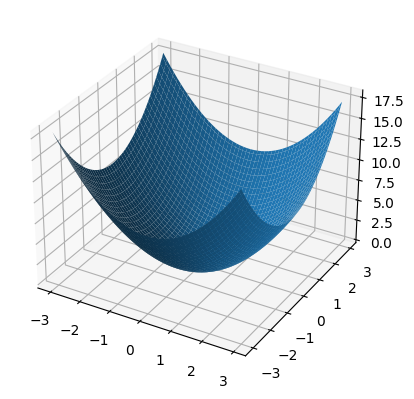

f 2 :


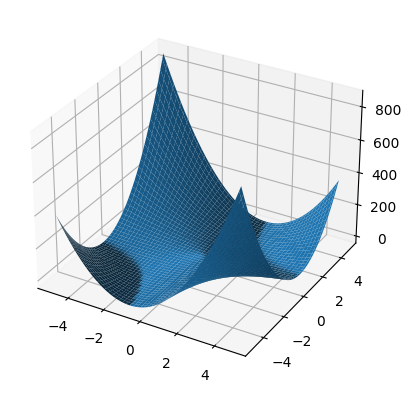

In [5]:
print("f 1 :")
plot_function(f_1)
print("f 2 :")
plot_function(f_2, bounds = [-5,5])

## Создание класса кастомной проблемы

In [6]:
class function_extrem_problem():
    def __init__(self, func):
        self.func = func
        
    def fitness(self, dv : np.array):
        return [self.func(dv)]
    
    def get_bounds(self):
        return ([-5, -5],
                [5, 5])

### Оптимизация первой функции

In [7]:
prob = pygmo.problem(function_extrem_problem(f_1))
comp_table = []

##### Решение с помощью *simple genetic algoritm*

In [8]:
algo = pygmo.algorithm(pygmo.sga(gen = 1000))
algo.set_verbosity(50)
pop = pygmo.population(prob, 20)
pop = algo.evolve(pop)


   Gen:        Fevals:          Best:   Improvement:
      1             20       0.140843              0
     51           1020      0.0026743              0
    101           2020      0.0026743              0
    151           3020      0.0026743              0
    201           4020      0.0026743              0
    251           5020      0.0026743              0
    301           6020      0.0026743              0
    351           7020      0.0026743              0
    401           8020      0.0026743              0
    451           9020      0.0026743              0
    501          10020      0.0026743              0
    551          11020      0.0026743              0
    601          12020      0.0026743              0
    651          13020      0.0026743              0
    701          14020     0.00219885              0
    751          15020     0.00219885              0
    801          16020     0.00219885              0
    851          17020     0.00219885        

In [9]:
uda = algo.extract(pygmo.sga)
uda.get_log()

[(1, 20, 0.14084285211671108, 0.0),
 (51, 1020, 0.002674303303674249, 0.0),
 (101, 2020, 0.002674303303674249, 0.0),
 (151, 3020, 0.002674303303674249, 0.0),
 (201, 4020, 0.002674303303674249, 0.0),
 (251, 5020, 0.002674303303674249, 0.0),
 (301, 6020, 0.002674303303674249, 0.0),
 (351, 7020, 0.002674303303674249, 0.0),
 (401, 8020, 0.002674303303674249, 0.0),
 (451, 9020, 0.002674303303674249, 0.0),
 (501, 10020, 0.002674303303674249, 0.0),
 (551, 11020, 0.002674303303674249, 0.0),
 (601, 12020, 0.002674303303674249, 0.0),
 (651, 13020, 0.002674303303674249, 0.0),
 (701, 14020, 0.0021988536359649788, 0.0),
 (751, 15020, 0.0021988536359649788, 0.0),
 (801, 16020, 0.0021988536359649788, 0.0),
 (851, 17020, 0.0021988536359649788, 0.0),
 (901, 18020, 0.0021988536359649788, 0.0),
 (951, 19020, 0.0021988536359649788, 0.0)]

In [10]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["sga", 1000, pop.champion_x, pop.champion_f])

[0.00219885]
[0.01876393 0.04297405]


##### Решение с помощью bee colony

In [11]:
algo = pygmo.algorithm(pygmo.bee_colony(gen = 100, limit = 20))
algo.set_verbosity(5)
pop = pygmo.population(prob, 20)
pop = algo.evolve(pop)


   Gen:        Fevals:          Best: Current Best:
      1             40      0.0615934      0.0615934
      6            240     0.00586308     0.00586308
     11            440    0.000176989    0.000176989
     16            640    9.08321e-06    9.08321e-06
     21            840    9.08321e-06    9.08321e-06
     26           1040     1.4781e-06     1.4781e-06
     31           1240    6.22778e-09    6.22778e-09
     36           1440    2.84685e-09    2.84685e-09
     41           1640    4.48689e-11    4.48689e-11
     46           1840    1.79285e-12    1.79285e-12
     51           2040    6.19973e-13    6.19973e-13
     56           2240    1.11239e-14    1.11239e-14
     61           2440     1.0314e-14     1.0314e-14
     66           2640    9.16477e-17    9.16477e-17
     71           2840    2.08345e-18    2.08345e-18
     76           3040    1.21378e-19    1.21378e-19
     81           3240    2.25021e-22    2.25021e-22
     86           3440    2.66993e-23    2.669

In [12]:
uda = algo.extract(pygmo.bee_colony)
uda.get_log()

[(1, 40, 0.06159335078353267, 0.06159335078353267),
 (6, 240, 0.005863080667885557, 0.005863080667885557),
 (11, 440, 0.00017698872680682452, 0.00017698872680682452),
 (16, 640, 9.083211358048314e-06, 9.083211358048314e-06),
 (21, 840, 9.083211358048314e-06, 9.083211358048314e-06),
 (26, 1040, 1.4780955789439193e-06, 1.4780955789439193e-06),
 (31, 1240, 6.2277762781464e-09, 6.2277762781464e-09),
 (36, 1440, 2.846854838272479e-09, 2.846854838272479e-09),
 (41, 1640, 4.4868860737905526e-11, 4.4868860737905526e-11),
 (46, 1840, 1.7928464797469403e-12, 1.7928464797469403e-12),
 (51, 2040, 6.199732132893972e-13, 6.199732132893972e-13),
 (56, 2240, 1.1123897564130857e-14, 1.1123897564130857e-14),
 (61, 2440, 1.031397461286296e-14, 1.031397461286296e-14),
 (66, 2640, 9.164771917387075e-17, 9.164771917387075e-17),
 (71, 2840, 2.0834464801750176e-18, 2.0834464801750176e-18),
 (76, 3040, 1.2137795163989612e-19, 1.2137795163989612e-19),
 (81, 3240, 2.250210725600983e-22, 2.250210725600983e-22),
 

In [13]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["bee", 100, pop.champion_x, pop.champion_f])

[5.10274164e-25]
[ 3.20759123e-13 -6.38269339e-13]


##### Решение с помощью grey wolf optimiser

In [14]:
algo = pygmo.algorithm(pygmo.gwo(gen = 100))
algo.set_verbosity(5)
pop = pygmo.population(prob, 20)
pop = algo.evolve(pop)


   Gen:         Alpha:          Beta:         Delta:
      1      0.0615771       0.227792       0.386038
      6    0.000520838    0.000869369     0.00094768
     11    2.91779e-07    4.43592e-07    1.40049e-06
     16    9.28186e-11    2.36135e-10    2.97321e-10
     21    7.26856e-15    1.15624e-14    1.88009e-14
     26    3.21124e-19    6.69967e-19    1.11389e-18
     31    1.74428e-24    3.39483e-24    1.22742e-23
     36    4.53121e-28    5.94452e-28    1.52693e-27
     41    2.22867e-33    3.66598e-33    6.71236e-33
     46    2.89778e-38    5.70627e-38    1.55267e-37
     51    8.35035e-44    5.54902e-43    1.10678e-42
     56    2.73526e-49    3.61756e-49     4.9483e-49
     61    2.73537e-56     1.3165e-55    1.80403e-55
     66    3.57126e-62    1.01207e-61    1.72186e-61
     71    1.07196e-68     1.9363e-68    2.92261e-68
     76    1.26167e-76    1.28282e-75    1.64645e-75
     81    6.38694e-86    2.66188e-85     6.4656e-85
     86    1.53156e-95    3.79328e-95    8.07

In [15]:
uda = algo.extract(pygmo.gwo)
uda.get_log()

[(1, 0.06157707636500564, 0.22779162561729108, 0.3860378390808773),
 (6, 0.0005208384070352382, 0.0008693688530550719, 0.0009476800757321079),
 (11, 2.917785882889305e-07, 4.435915629351053e-07, 1.4004941176902223e-06),
 (16, 9.281861429810409e-11, 2.361350247768892e-10, 2.9732142675906187e-10),
 (21, 7.26856214074556e-15, 1.1562361766727927e-14, 1.8800887894932077e-14),
 (26, 3.211237227397805e-19, 6.699671986945841e-19, 1.1138897771245917e-18),
 (31, 1.744283143940184e-24, 3.394832768938698e-24, 1.2274209315486275e-23),
 (36, 4.531209679866403e-28, 5.944518894916959e-28, 1.526933370275136e-27),
 (41, 2.2286690963201404e-33, 3.665981101758701e-33, 6.712362168975735e-33),
 (46, 2.8977849232540197e-38, 5.706266365566951e-38, 1.5526747569118272e-37),
 (51, 8.35034616237461e-44, 5.549024965347983e-43, 1.1067810847825278e-42),
 (56, 2.7352607805221743e-49, 3.6175561586204295e-49, 4.948297844418101e-49),
 (61, 2.735372452596265e-56, 1.3165003725049168e-55, 1.8040258027393195e-55),
 (66, 3.5

In [16]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["auf", 100, pop.champion_x, pop.champion_f])

[1.04817995e-100]
[ 5.63730820e-51 -8.54627119e-51]


#### Сравнение результатов

In [17]:
display_comp_table(comp_table, true_minima_ = np.array([0,0]))

name	| gen	| opt coords		| opt val	| err
-------------------------------------------------------------
sga	| 1000	| (0.019 0.043)	| 0.0022	| [0.02 0.04]
bee	| 100	| (3.2e-13 -6.4e-13)	| 5.1e-25	| [0. 0.]
auf	| 100	| (5.6e-51 -8.5e-51)	| 1e-100	| [0. 0.]


### Оптимизация второй функции

In [18]:
prob = pygmo.problem(function_extrem_problem(f_2))
comp_table = []

##### Решение с помощью *simple genetic algoritm*

In [19]:
algo = pygmo.algorithm(pygmo.sga(gen = 1000))
algo.set_verbosity(50)
pop = pygmo.population(prob, 20)
pop = algo.evolve(pop)


   Gen:        Fevals:          Best:   Improvement:
      1             20       -25.8181       -7.49572
     51           1020       -25.9554              0
    101           2020       -25.9672              0
    151           3020       -25.9672              0
    201           4020       -25.9672              0
    251           5020       -25.9693              0
    301           6020       -25.9693              0
    351           7020       -25.9693              0
    401           8020       -25.9693              0
    451           9020       -25.9737              0
    501          10020       -25.9737              0
    551          11020       -25.9737              0
    601          12020       -25.9757              0
    651          13020       -25.9757              0
    701          14020       -25.9761              0
    751          15020       -25.9761              0
    801          16020       -25.9762              0
    851          17020       -25.9762        

In [20]:
uda = algo.extract(pygmo.sga)
uda.get_log()

[(1, 20, -25.818052643594125, -7.495718040181426),
 (51, 1020, -25.955393866359568, 0.0),
 (101, 2020, -25.967181305964306, 0.0),
 (151, 3020, -25.967181305964306, 0.0),
 (201, 4020, -25.967181305964306, 0.0),
 (251, 5020, -25.969292227015526, 0.0),
 (301, 6020, -25.969292227015526, 0.0),
 (351, 7020, -25.969292227015526, 0.0),
 (401, 8020, -25.969292227015526, 0.0),
 (451, 9020, -25.97370437435479, 0.0),
 (501, 10020, -25.97370437435479, 0.0),
 (551, 11020, -25.97370437435479, 0.0),
 (601, 12020, -25.975658306013333, 0.0),
 (651, 13020, -25.975658306013333, 0.0),
 (701, 14020, -25.976063666183496, 0.0),
 (751, 15020, -25.976063666183496, 0.0),
 (801, 16020, -25.976193839384756, 0.0),
 (851, 17020, -25.976225800671926, 0.0),
 (901, 18020, -25.976225800671926, 0.0),
 (951, 19020, -25.976418117380177, 0.0)]

In [21]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["sga", 1000, pop.champion_x, pop.champion_f])

[-25.97641812]
[-1.15353954 -4.33685777]


##### Решение с помощью *bee colony*

In [22]:
algo = pygmo.algorithm(pygmo.bee_colony(gen = 1000, limit = 20))
algo.set_verbosity(50)
pop = pygmo.population(prob, 20)

In [23]:
pop = algo.evolve(pop)


   Gen:        Fevals:          Best: Current Best:
      1             40       -25.0013       -25.0013
     51           2040            -26       -25.7568
    101           4040            -26       -25.8386
    151           6040            -26       -25.7827
    201           8040            -26       -25.9717
    251          10040            -26            -26
    301          12040            -26       -24.6824
    351          14040            -26        -23.966
    401          16040            -26       -25.8269
    451          18040            -26       -23.8406
    501          20040            -26        -25.302
    551          22040            -26       -25.8733
    601          24040            -26       -20.4999
    651          26040            -26        -25.982
    701          28040            -26       -25.9921
    751          30040            -26       -19.0425
    801          32040            -26       -21.9557
    851          34040            -26       -2

In [24]:
uda = algo.extract(pygmo.bee_colony)
uda.get_log()

[(1, 40, -25.001347085446366, -25.001347085446366),
 (51, 2040, -25.999992557121757, -25.75684621865544),
 (101, 4040, -25.999992557121757, -25.838598929419387),
 (151, 6040, -25.999992557121757, -25.78274985354282),
 (201, 8040, -25.999992557121757, -25.971675378088154),
 (251, 10040, -25.999992557121757, -25.999984394089296),
 (301, 12040, -25.999992557121757, -24.682395228061885),
 (351, 14040, -25.999992557121757, -23.96604936590148),
 (401, 16040, -25.999992557121757, -25.826920374275407),
 (451, 18040, -25.999992557121757, -23.840559916091628),
 (501, 20040, -25.999992557121757, -25.30204021771383),
 (551, 22040, -25.999992557121757, -25.873282406122954),
 (601, 24040, -25.999992557121757, -20.499912014894555),
 (651, 26040, -25.999992557121757, -25.9820276571187),
 (701, 28040, -25.999992557121757, -25.992098040470033),
 (751, 30040, -25.999992557121757, -19.042461466489407),
 (801, 32040, -25.999992557121757, -21.95565936464461),
 (851, 34040, -25.999992557121757, -25.283735337

In [25]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["bee", 1000, pop.champion_x, pop.champion_f])

[-25.99999256]
[-0.99946496 -5.        ]


##### Решение с помощью grey wolf optimiser

In [26]:
algo = pygmo.algorithm(pygmo.gwo(gen = 1000))
algo.set_verbosity(50)
pop = pygmo.population(prob, 20)
pop = algo.evolve(pop)


   Gen:         Alpha:          Beta:         Delta:
      1       -23.1324       -13.5769       -12.1448
     51            -26       -25.9999       -25.9997
    101            -26            -26            -26
    151            -26            -26            -26
    201            -26            -26            -26
    251            -26            -26            -26
    301            -26            -26            -26
    351            -26            -26            -26
    401            -26            -26            -26
    451            -26            -26            -26
    501            -26            -26            -26
    551            -26            -26            -26
    601            -26            -26            -26
    651            -26            -26            -26
    701            -26            -26            -26
    751            -26            -26            -26
    801            -26            -26            -26
    851            -26            -26        

In [27]:
uda = algo.extract(pygmo.gwo)
uda.get_log()

[(1, -23.132439589099043, -13.57689374505469, -12.144807267184376),
 (51, -25.999950937256262, -25.999891001204563, -25.99973214553092),
 (101, -25.99999883250336, -25.999968906102648, -25.999950937256262),
 (151, -25.99999883250336, -25.999980523935445, -25.999968906102648),
 (201, -25.999999252622114, -25.99999883250336, -25.999980523935445),
 (251, -25.999999252622114, -25.99999883250336, -25.99999734592676),
 (301, -25.999999252622114, -25.99999883250336, -25.99999734592676),
 (351, -25.999999787407404, -25.999999252622114, -25.99999883250336),
 (401, -25.999999787407404, -25.999999252622114, -25.999999089792126),
 (451, -25.999999787407404, -25.999999252622114, -25.999999089792126),
 (501, -25.999999787407404, -25.999999252622114, -25.999999089792126),
 (551, -25.99999990285339, -25.999999787407404, -25.999999252622114),
 (601, -25.99999990285339, -25.999999787407404, -25.999999252622114),
 (651, -25.99999990285339, -25.999999787407404, -25.999999252622114),
 (701, -25.99999990285

In [28]:
print(pop.champion_f)
print(pop.champion_x)
comp_table.append(["auf", 1000, pop.champion_x, pop.champion_f])

[-26.]
[-0.9999888 -5.       ]


#### Сравнение результатов

In [29]:
display_comp_table(comp_table, true_minima_ = [np.array([-1,-5])])

name	| gen	| opt coords		| opt val	| err
-------------------------------------------------------------
sga	| 1000	| (-1.2 -4.3)	| -2.6e+01	| [0.15 0.66]
bee	| 1000	| (-1.0 -5.0)	| -2.6e+01	| [0. 0.]
auf	| 1000	| (-1.0 -5.0)	| -2.6e+01	| [0. 0.]
